# kaggle
- ref : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
import shap
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [2]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test=pd.read_csv('./test.csv')
train=pd.read_csv('./train.csv')

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 파생피쳐1. 수영장(pool)
- 있으면 1 없으면 0

In [9]:
train['pool']=np.where(train['PoolQC'].isna(),0,1)
test['pool']=np.where(test['PoolQC'].isna(),0,1)

In [10]:
useless = ['Id','PoolArea','PoolQC'] 
train.drop(useless,axis = 1,inplace = True)
test.drop(useless,axis = 1,inplace = True)

In [11]:
from scipy import stats
shap = stats.shapiro(train['SalePrice'])
print('Skewness : %f' % abs(train['SalePrice']).skew())
print('Kurtosis : %f' % abs(train['SalePrice']).kurt())
print('Shapiro_Test_statistic : %f' % shap.statistic )
print('Shapiro_Test_pvalue : %f' % shap.pvalue )

Skewness : 1.882876
Kurtosis : 6.536282
Shapiro_Test_statistic : 0.869672
Shapiro_Test_pvalue : 0.000000


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


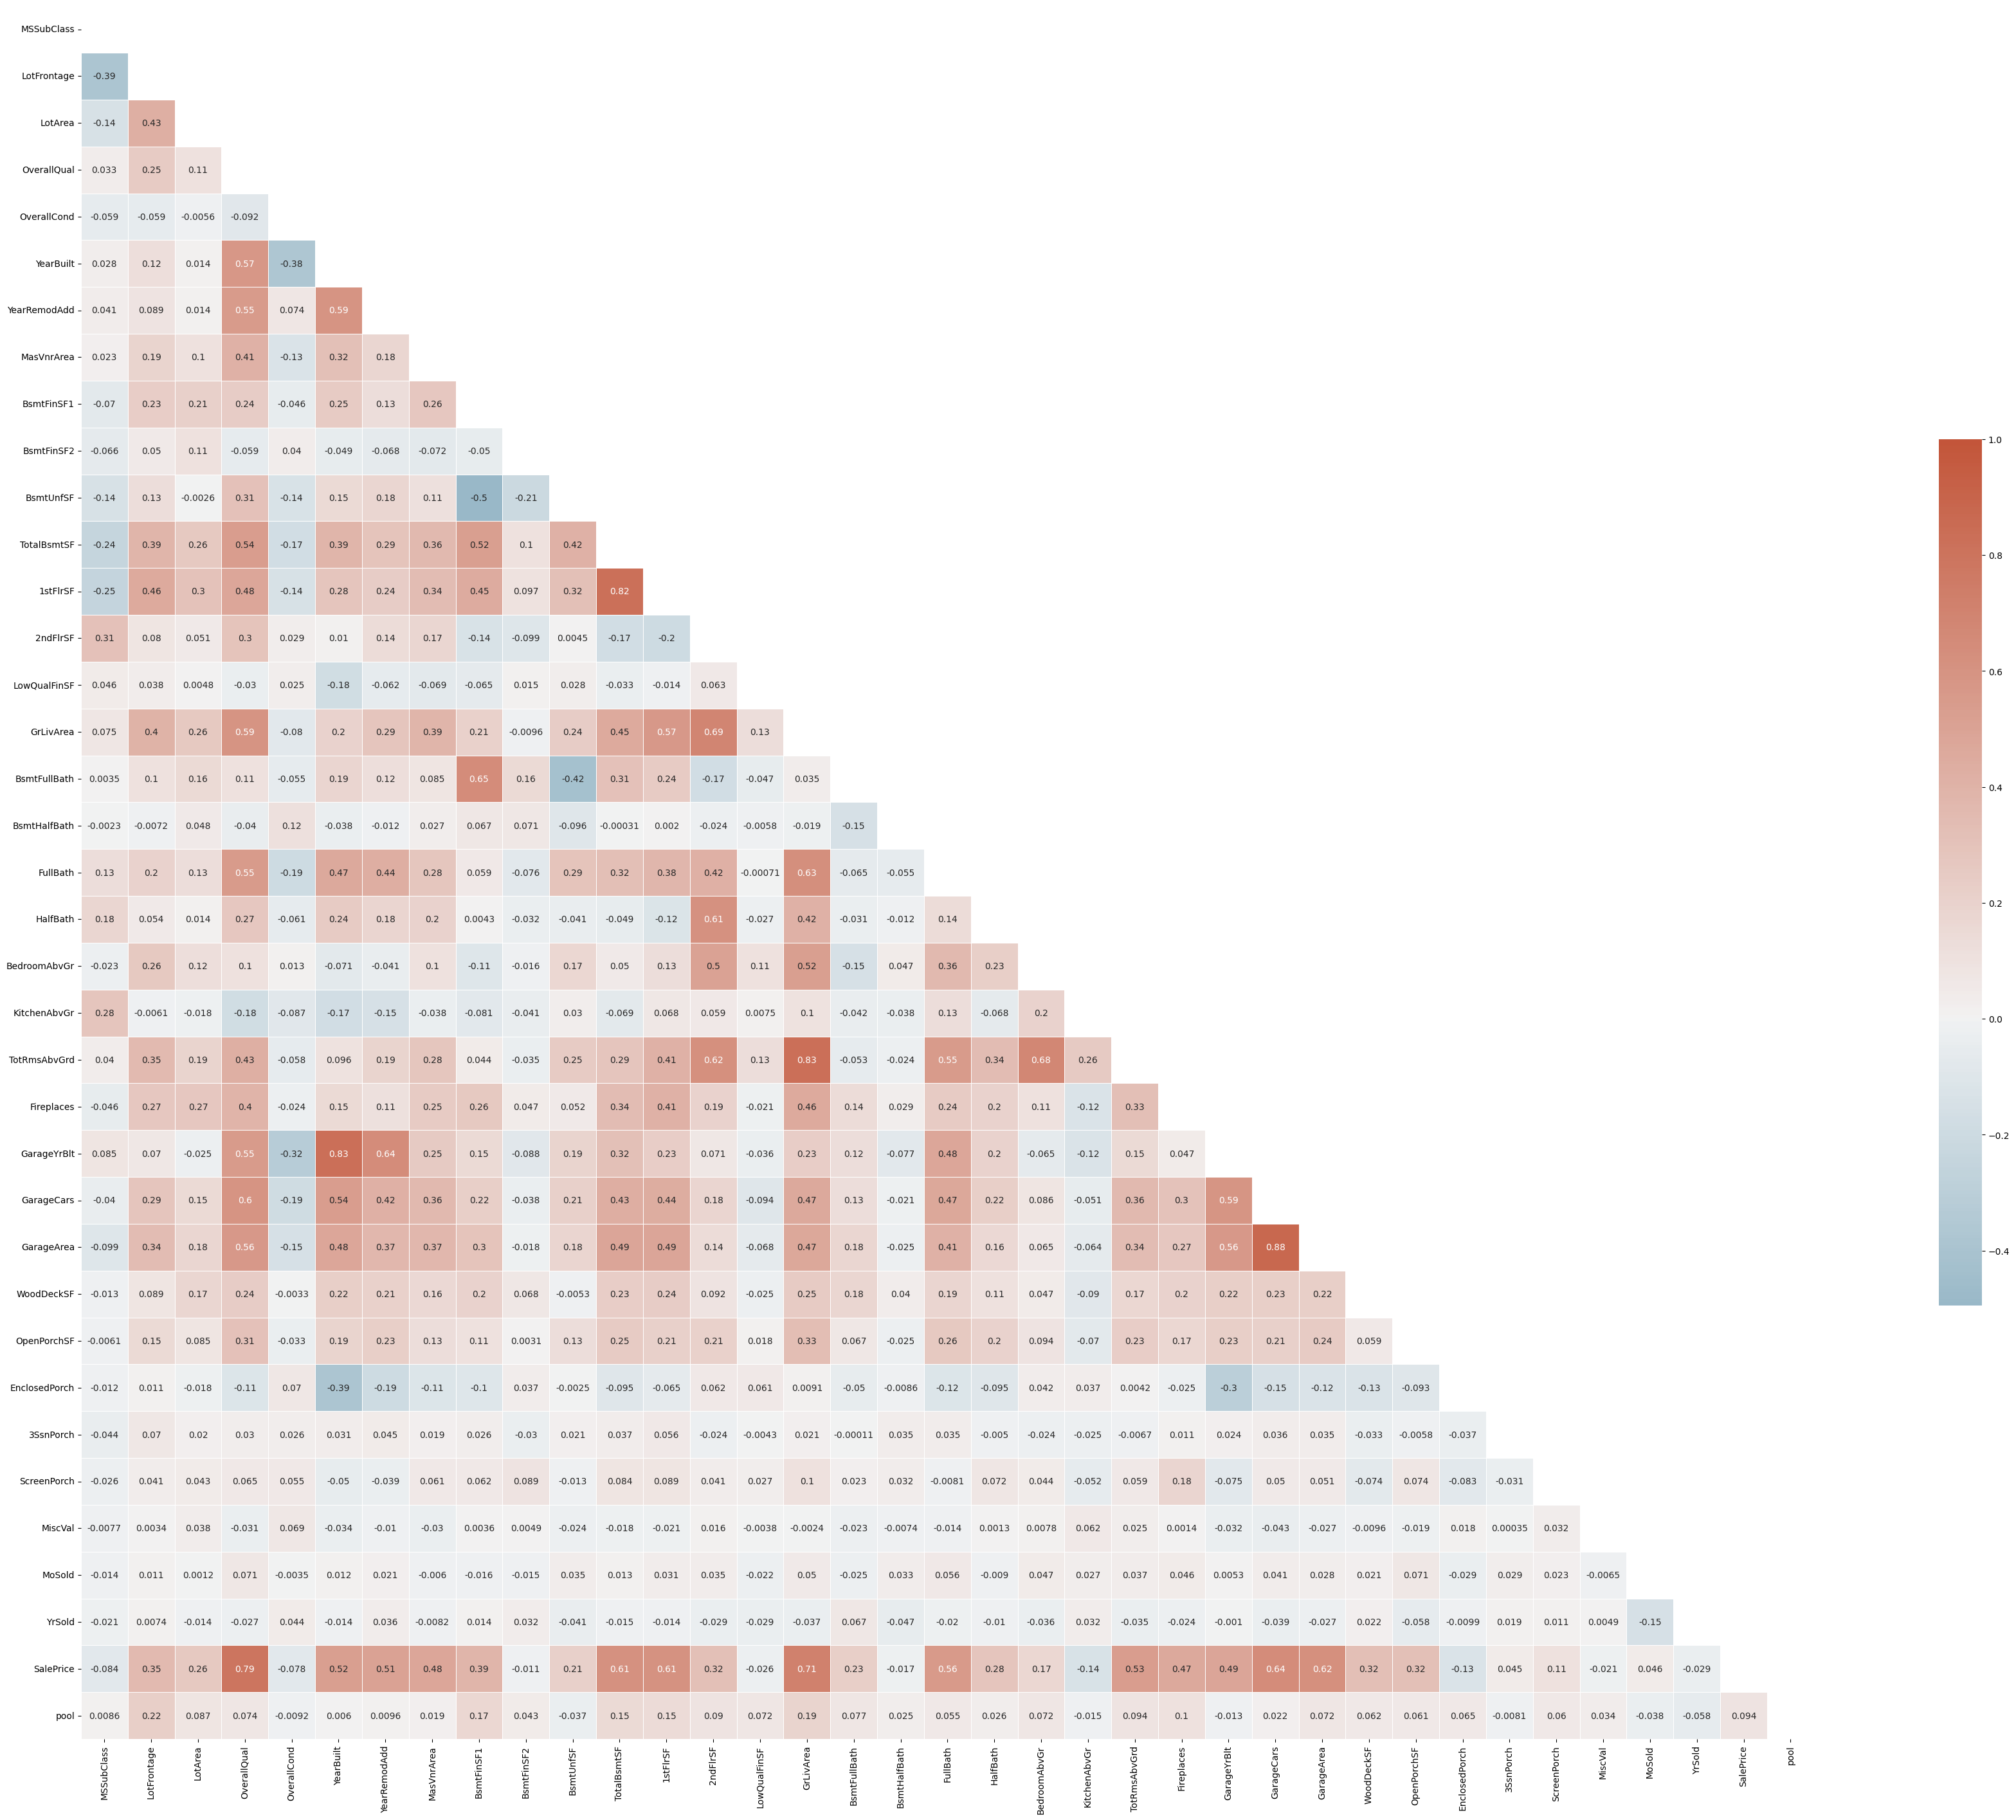

In [12]:
f, ax = plt.subplots(figsize=(50, 35))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(train.corr(), mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

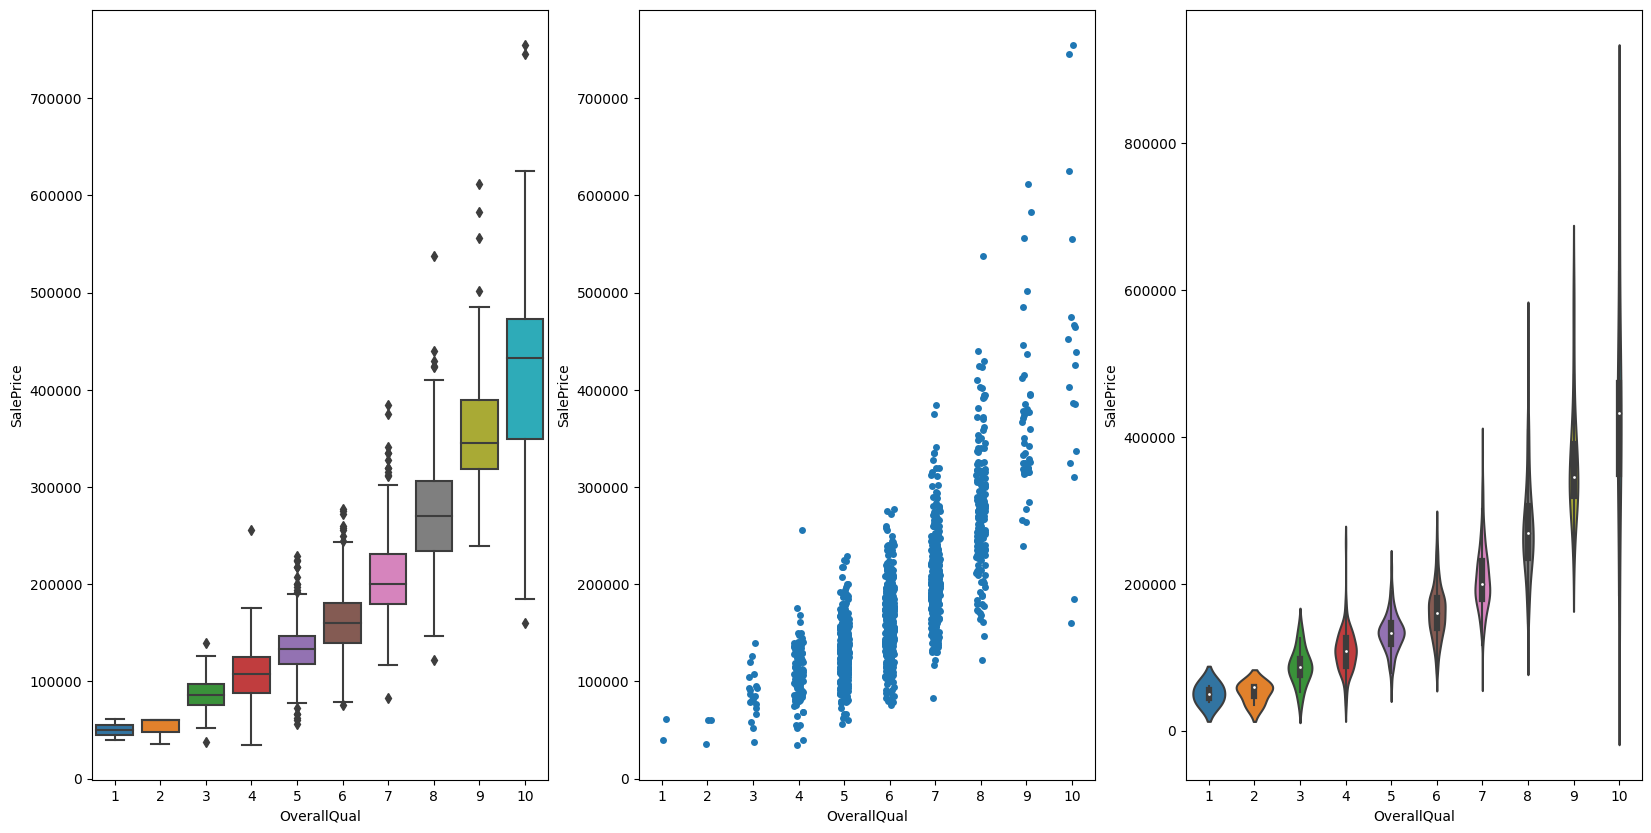

In [13]:
# OverallQuall - SalePrice [Pearson = 0.8]
fig,ax=plt.subplots(1,3,figsize=(20,10))
sns.stripplot(data=train,x='OverallQual',y='SalePrice',ax=ax[1])
sns.violinplot(data=train,x='OverallQual',y='SalePrice',ax=ax[2])
sns.boxplot(data=train,x='OverallQual',y='SalePrice',ax=ax[0])
plt.show()

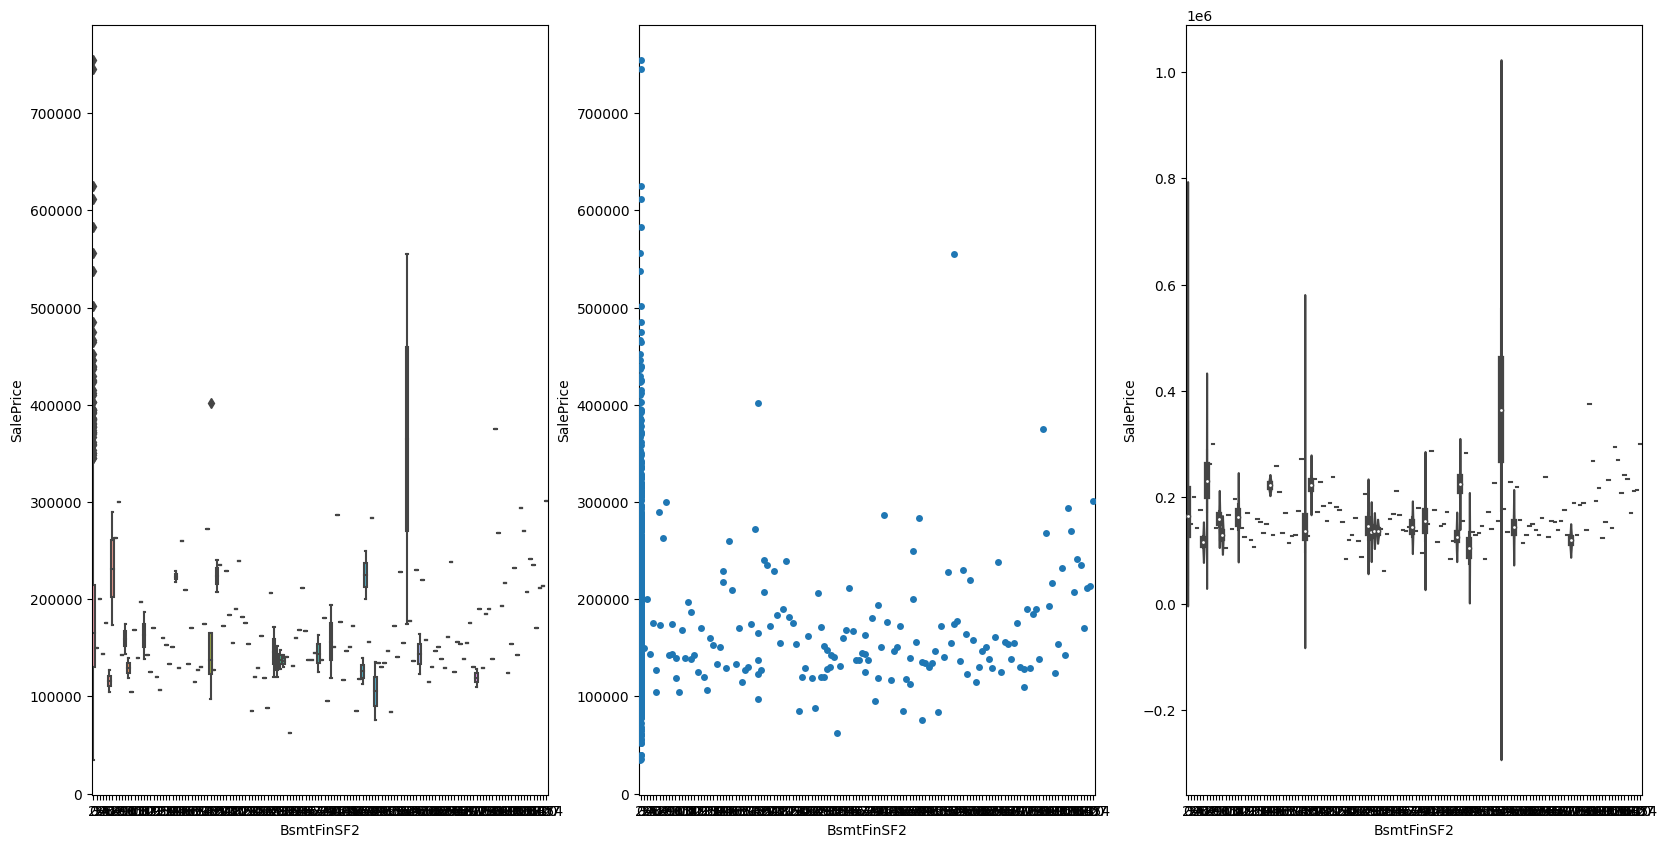

In [14]:
# OverallQuall - SalePrice [Pearson = -0.011
fig,ax=plt.subplots(1,3,figsize=(20,10))
sns.stripplot(data=train,x='BsmtFinSF2',y='SalePrice',ax=ax[1])
sns.violinplot(data=train,x='BsmtFinSF2',y='SalePrice',ax=ax[2])
sns.boxplot(data=train,x='BsmtFinSF2',y='SalePrice',ax=ax[0])
plt.show()

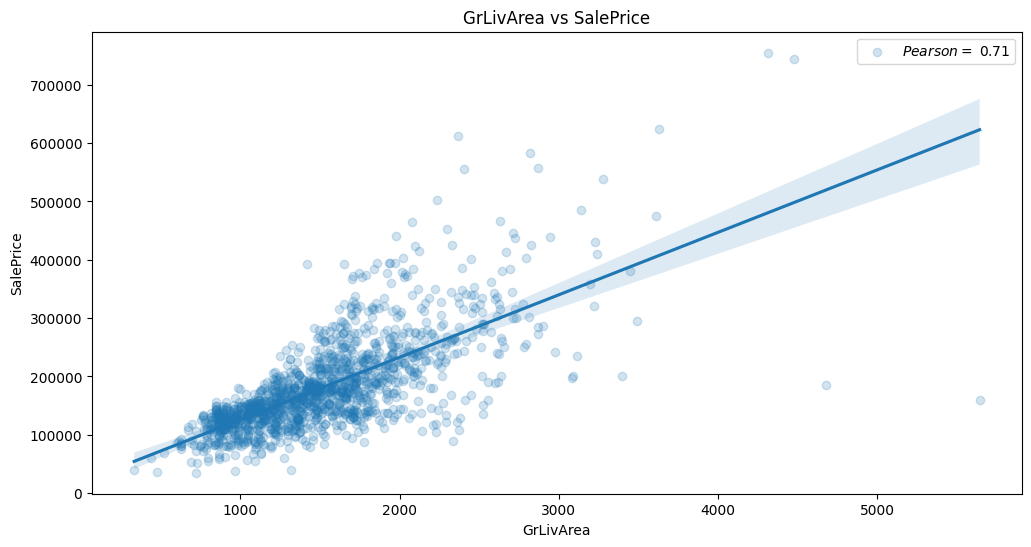

In [15]:
# GrLivArea vs SalePrice [corr = 0.71]

Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

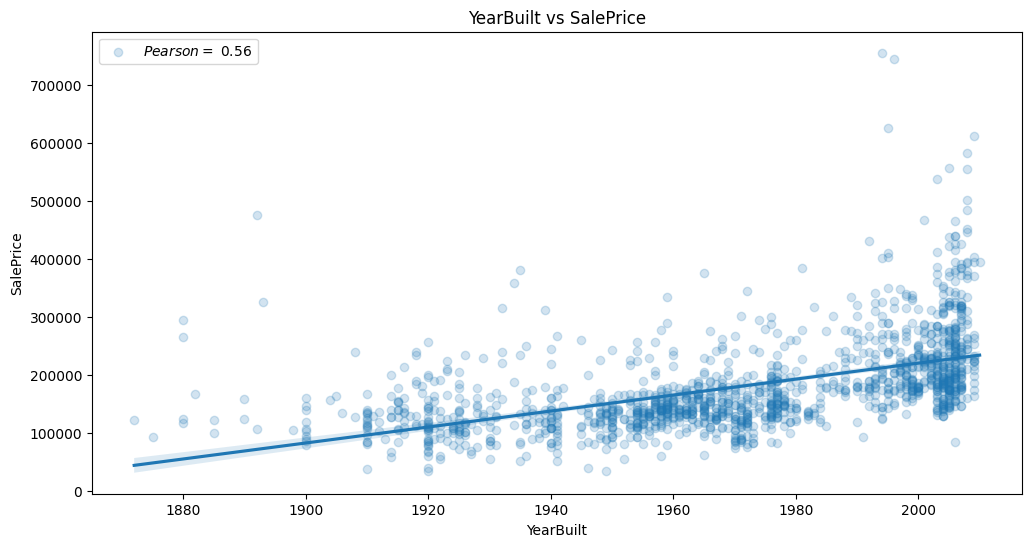

In [16]:
# YearBuilt vs SalePrice

Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

In [17]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 파생피쳐2. 팔린날짜연월(YMsold)

In [18]:
train['YrSold'] = train['YrSold'].apply(str)
train['MoSold'] = train['MoSold'].apply(str)
train['YMsold'] = train['YrSold']+'-'+ train['MoSold']
train['YMsold'] = train['YMsold'].astype('datetime64')

test['YrSold'] = test['YrSold'].apply(str)
test['MoSold'] = test['MoSold'].apply(str)
test['YMsold'] = test['YrSold']+'-'+ test['MoSold']
test['YMsold'] = test['YMsold'].astype('datetime64')

In [19]:
train.drop(['MoSold','YrSold'],axis=1,inplace=True)
test.drop(['MoSold','YrSold'],axis=1,inplace=True)

## 결측 처리

### train

In [20]:
nan=pd.DataFrame(train.isna().sum(),columns=['Nan_sum'])
nan['feat']=nan.index
nan=nan[nan['Nan_sum']>0]
nan['Percentage']=(nan['Nan_sum']/1460)*100
nan=nan.sort_values(by=['Nan_sum'])
nan.insert(0,'Serial No.',range(1,len(nan)+1))
nan

,Serial No.,Nan_sum,feat,Percentage
Electrical,1,1,Electrical,0.068493
MasVnrType,2,8,MasVnrType,0.547945
MasVnrArea,3,8,MasVnrArea,0.547945
BsmtQual,4,37,BsmtQual,2.534247
BsmtCond,5,37,BsmtCond,2.534247
BsmtFinType1,6,37,BsmtFinType1,2.534247
BsmtFinType2,7,38,BsmtFinType2,2.602740
BsmtExposure,8,38,BsmtExposure,2.602740
GarageCond,9,81,GarageCond,5.547945
GarageQual,10,81,GarageQual,5.547945


In [21]:
train.isna().sum()[train.isna().sum()>0].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature'],
      dtype='object')

In [22]:
# 결측 최빈값으로 채우기

train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mode()[0])

train["Alley"] = train["Alley"].replace(['Grvl','Pave'],[0,1])
train["Alley"] = train["Alley"].fillna(0)

train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
        
for col in ['MiscFeature','Fence','FireplaceQu','GarageType', 'GarageFinish', 'GarageQual',
            'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType']:
    train[col] = train[col].fillna('None')
    
train = train.drop('GarageYrBlt' , axis = 1)

### test

In [23]:
nan=pd.DataFrame(test.isna().sum(),columns=['Nan_sum'])
nan['feat']=nan.index
nan=nan[nan['Nan_sum']>0]
nan['Percentage']=(nan['Nan_sum']/1460)*100
nan=nan.sort_values(by=['Nan_sum'])
nan.insert(0,'Serial No.',range(1,len(nan)+1))
nan

,Serial No.,Nan_sum,feat,Percentage
BsmtUnfSF,1,1,BsmtUnfSF,0.068493
GarageArea,2,1,GarageArea,0.068493
GarageCars,3,1,GarageCars,0.068493
KitchenQual,4,1,KitchenQual,0.068493
TotalBsmtSF,5,1,TotalBsmtSF,0.068493
BsmtFinSF2,6,1,BsmtFinSF2,0.068493
BsmtFinSF1,7,1,BsmtFinSF1,0.068493
SaleType,8,1,SaleType,0.068493
Exterior1st,9,1,Exterior1st,0.068493
Exterior2nd,10,1,Exterior2nd,0.068493


In [24]:
test.isna().sum()[test.isna().sum()>0].index

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [25]:
# 결측 최빈값으로 채우기

test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])

test['Utilities'] = test['Utilities'].fillna('NoSeWa')

test["Alley"] = test["Alley"].replace(['Grvl','Pave'],[0,1])
test["Alley"] = test["Alley"].fillna(0)
        
for col in ['MasVnrType','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','FireplaceQu','Fence','MiscFeature','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    test[col] = test[col].fillna('None')
    
for col in ('BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','BsmtUnfSF', 'TotalBsmtSF',"GarageCars",'GarageArea'):
    test[col] = test[col].fillna(0)
    
test = test.drop('GarageYrBlt' , axis = 1)

## 파생피쳐3. 방갯수당전체면적(AreaPerRoom)

In [26]:
train["AreaPerRoom"] = train["GrLivArea"] / (train["TotRmsAbvGrd"] +
                                            train["FullBath"] +
                                            train["HalfBath"] +
                                            train["KitchenAbvGr"])

test["AreaPerRoom"] = test["GrLivArea"] / (test["TotRmsAbvGrd"] +
                                            test["FullBath"] +
                                            test["HalfBath"] +
                                            test["KitchenAbvGr"])

## 파생피쳐4. 전체평방피트(totalSF), 리모델링&빌딩연도(YearTotBuilt)

In [27]:
train["totalSF"] = train['TotalBsmtSF'] + train["1stFlrSF"] + train["2ndFlrSF"]
train['YearTotBuilt']= train['YearRemodAdd'] + train['YearBuilt']
train = train.drop(['YearRemodAdd','TotalBsmtSF',"1stFlrSF","2ndFlrSF"] , axis = 1)

test["totalSF"] = test['TotalBsmtSF'] + test["1stFlrSF"] + test["2ndFlrSF"]
test['YearTotBuilt']= test['YearRemodAdd'] + test['YearBuilt']
test = test.drop(['YearRemodAdd','TotalBsmtSF',"1stFlrSF","2ndFlrSF"] , axis = 1)

## 파생피쳐 5. 전체평가(overall), 전체화장실(bath)
- overall:  'OverallQual' + 'OverallCond'
- bath : 'FullBath'+ 'HalfBath'*0.5 + BsmtFullBath + BsmtHalfBath*0.5

In [28]:
train['overall'] = train['OverallQual']+train['OverallCond']
train['bath'] = train['FullBath'] + train['FullBath']*0.5 + train['BsmtFullBath'] + 0.5*train['BsmtHalfBath']
train.drop(['OverallQual', 'OverallCond','FullBath', 'HalfBath', 'BsmtFullBath','BsmtHalfBath'],axis=1,inplace=True)


test['overall'] = test['OverallQual']+test['OverallCond']
test['bath'] = test['FullBath'] + test['FullBath']*0.5 + test['BsmtFullBath'] + 0.5*test['BsmtHalfBath']
test.drop(['OverallQual', 'OverallCond','FullBath', 'HalfBath','BsmtFullBath','BsmtHalfBath' ],axis=1,inplace=True)

## type별 컬럼 확인

In [29]:
train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Alley', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice',
       'AreaPerRoom', 'totalSF', 'YearTotBuilt', 'overall', 'bath'],
      dtype='object')

In [30]:
train.select_dtypes(exclude=['int64','float64']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'pool', 'YMsold'],
      dtype='object')

In [31]:
train.select_dtypes(include=['object']).columns.shape

(41,)

In [32]:
test.select_dtypes(include=['object']).columns.shape

(41,)

## <big><strong>Label encoding.</strong></big>

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
train.drop(['Street'],axis=1,inplace=True)
test.drop(['Street'],axis=1,inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder
col_list = train.select_dtypes(include=['object']).columns
for col in col_list:
    l = LabelEncoder() 
    train[col] = l.fit_transform(train[col].values.reshape(-1)) 
    test[col] = l.transform(test[col].values.reshape(-1))

In [36]:
print(train.select_dtypes(include=['object']).columns.shape)
print(test.select_dtypes(include=['object']).columns.shape)

(0,)
(0,)


In [37]:
train['YMsold'][:5]

0   2008-02-01
1   2007-05-01
2   2008-09-01
3   2006-02-01
4   2008-12-01
Name: YMsold, dtype: datetime64[ns]

## 왜도가 큰 피쳐 로그 스케일링

In [38]:
from scipy.stats import skew
col_list = ['LotFrontage', 'LotArea', 'Alley', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'AreaPerRoom', 'totalSF', 'bath']
skew_list=[]
for col in col_list:
    왜도 = skew(train[col])
    if 왜도 >0.5:
        train[col] = np.log1p(train[col])
        test[col] = np.log1p(test[col])

# target feature('SalePrice') 로그스케일링

In [39]:
train['SalePrice'] = np.log1p(train['SalePrice'])

# 학습&점수

In [40]:
sub=pd.read_csv('./sample_submission.csv')

In [ ]:
X = train.drop(['SalePrice','YMsold'],axis=1)
y = train['SalePrice']
test = test.drop('YMsold',axis=1)

In [42]:
model = XGBRegressor()
model.fit(X,y)
pre=model.predict(test)

s_pre = np.expm1(pre)
sub['SalePrice'] = s_pre
sub.to_csv("XGB.csv", index = False, header = True)

[11.837704 11.99902  12.197013 12.192479 12.109165 12.031366 12.101368
 12.039666 12.116632 11.701514]


In [48]:
model = LGBMRegressor()
model.fit(X,y)
pre=model.predict(test)

s_pre = np.expm1(pre)
sub['SalePrice'] = s_pre
sub.to_csv("LGB.csv", index = False, header = True)